<h1 align="center"> Tarea 1: Programación Genética </h1>
<h2 align="center"> Problema 1 </h2>

In [ ]:
git clone

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pydotplus
import jpype
import os
import random

from utilsGPalta import *
from tqdm import tqdm

In [ ]:
libGPjar = 'GPaltav2.jar'
arg = '-Djava.class.path=%s'%os.path.join(os.getcwd(),libGPjar)
jvmPath = jpype.getDefaultJVMPath()
jpype.startJVM(jvmPath, arg)
GP = jpype.JPackage("gpalta")

In [ ]:
config = GP.core.Config('Config.txt')
config.nGenerations   = 50     # numero de generaciones
config.populationSize = 100       # tamaño de la poblacion
config.maxDepth       = 6       # profundidad maxima
config.initialMinDepth= 3        # profundidad minima arboles poblacion inicial
config.initialMaxDepth= 4        # profundidad maxima arboles poblacion inicial
config.population     = 'gpalta.core.SingleTreePopulation'  # numero de salidas-arboles
config.fitness        = 'gpalta.core.FitnessClassic'        # criterio de fitness
config.constLowLimit  = 0
config.constUpLimit   = 10
prob_mutation         = 0.15
prob_crossover        = 0.7
# probability of crossover = upLimitProbCrossOver - 0
# probability of mutation = upLimitProbMutation - upLimitProbCrossOver
# probability of reproduction = 1 - upLimitProbMutation
config.upLimitProbCrossOver = prob_crossover
config.upLimitProbMutation  = prob_mutation + prob_crossover

# Más parámetros de configuracion de GP están en los archivos Config.txt y Nodes.txt

##### ---- Funciones disponibles ---
#['Cos', 'Sin', 'Exponential', 'Square', 'SquareRoot', 'Divide', 'Plus', 'Minus', 'Times']
selectedFuntion = ['Plus', 'Minus', 'Times','Divide']
# Assuming setFuntions is a method of the GP object or a separate function
# setFuntions(selectedFuntion) # This line needs to be uncommented and potentially modified based on where setFuntions is defined

# Stop the JVM after using it
# jpype.shutdownJVM() # This line can be uncommented if you want to shut down the JVM after this cell

# 1) Muestreo de la función

[ -8.6915982   -8.6054588   -8.23847239  -7.97971506  -7.86710993
  -7.63350866  -7.45793487  -6.91271133  -6.84578783  -6.73154575
  -6.60725181  -6.53988323  -6.4628921   -6.29917246  -6.27835481
  -6.11375697  -6.04426356  -5.30524744  -5.24765652  -4.8602
  -4.81497652  -4.78327327  -3.17345948  -2.96978511  -2.70797086
  -2.27055125  -2.23456598  -1.05335454  -0.53997062  -0.28566927
  -0.18396717  -0.09912057   0.55729241   0.7470898    1.08458645
   1.09780161   1.31256876   2.29207893   2.60120571   3.69563217
   4.54587425   5.8840129    6.04646327   6.15126162   6.73453356
   7.12152746   7.42822866   7.47850923   8.67783722   8.76436853
 -39.85503504 -39.18004053 -38.81685792 -36.73461843 -36.49886498
 -33.57938381 -32.10224088 -31.63798386 -29.25297878 -27.53216716
 -25.54358256 -23.83158366 -23.72771033 -22.4001346  -21.73071226
 -20.79196002 -19.51163545 -17.72590514 -17.43035891 -16.49099881
 -14.31528428 -13.27136522 -12.08167315 -11.59602253  -9.63597862]


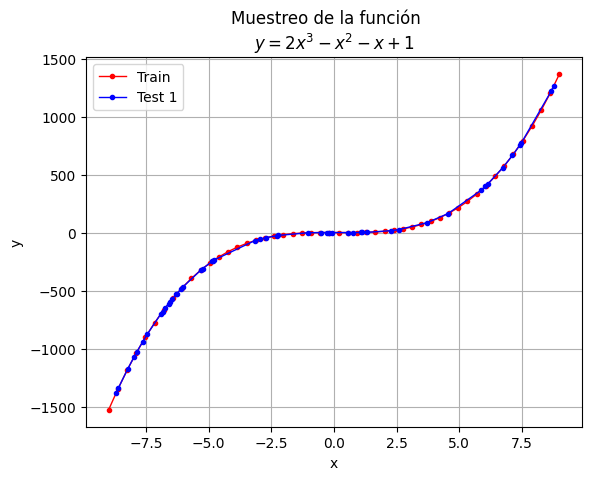

In [ ]:
x_range = [-9, 9]
x_range_test = [-40, 40]

X_train = np.linspace(*x_range, 50)
X_test = np.sort((x_range[1] - x_range[0]) * np.random.random_sample(size=50) + x_range[0])
X_test_2 = np.concatenate((np.sort((x_range[0] - x_range_test[0]) * np.random.random_sample(size=25) + x_range_test[0]),
                          np.sort((x_range_test[1] - x_range[1]) * np.random.random_sample(size=25) + x_range[1])))

X_test_2 = np.sort((x_range[0] - x_range_test[0]) * np.random.random_sample(size=25) + x_range_test[0])

print(np.concatenate((X_test, X_test_2), axis=-1))

def f(x): return 2*x**3 - x**2 - x + 1

y_train = f(X_train)
y_test = f(X_test)

plot_kwargs = {
    'linestyle': '-',
    'marker': '.',
    'linewidth': 1}

plt.plot(X_train, y_train, **plot_kwargs, color='red', label='Train')
plt.plot(X_test, y_test, **plot_kwargs, color='blue', label='Test 1')
plt.xlabel('x')
plt.ylabel('y')
plt.suptitle('Muestreo de la función')
plt.title(r'$y = 2x^3 - x^2 - x + 1$')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_train.shape

(50,)